# New Mask Editor Stuff

## For editing the mask

### The new mask made specifically of Titan.

Just placing code here that'll take the image of the mask, display it, and then edit it.



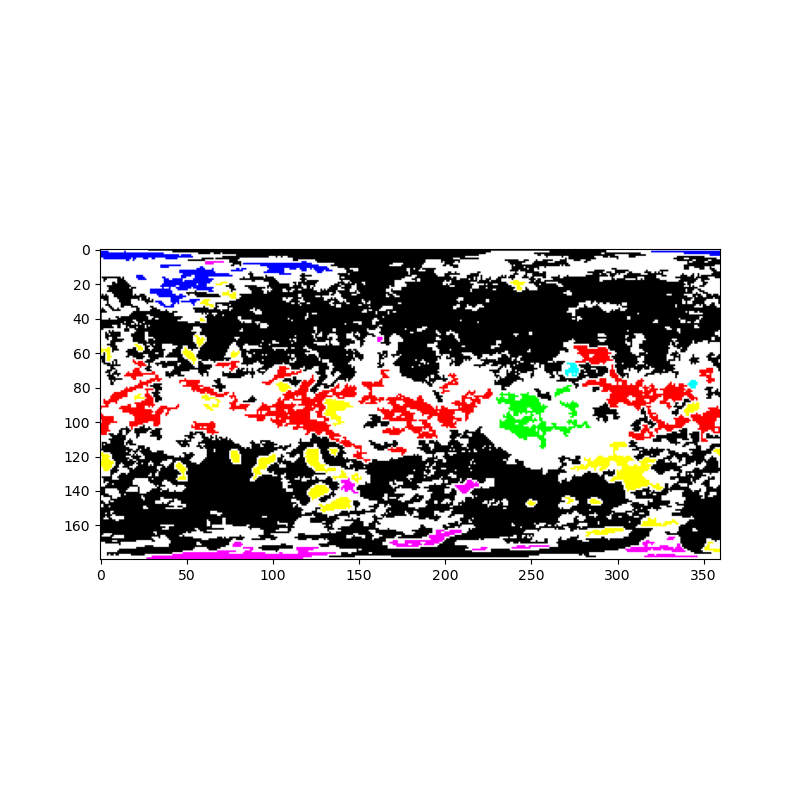

In [2]:
%matplotlib ipympl
# READ IN FILES

#IMPORTS 
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#Now we need to read in the images so we can manipulate them.
#im1 = Image.open("1DegreeMap.tif")
im1 = Image.open("NewTitanMask.bmp")
ima1 = np.array(im1)

fig, ax = plt.subplots(figsize = (8,8))
image = ax.imshow(ima1)
#Tifs are stored by y, x, and then RGB. RGB is mostly irrelevant to us though, as this is monochrome. 

In [5]:
print(len(ima1))
print(len(ima1[0]))
print(len(ima1[0][0]))

180
360
3


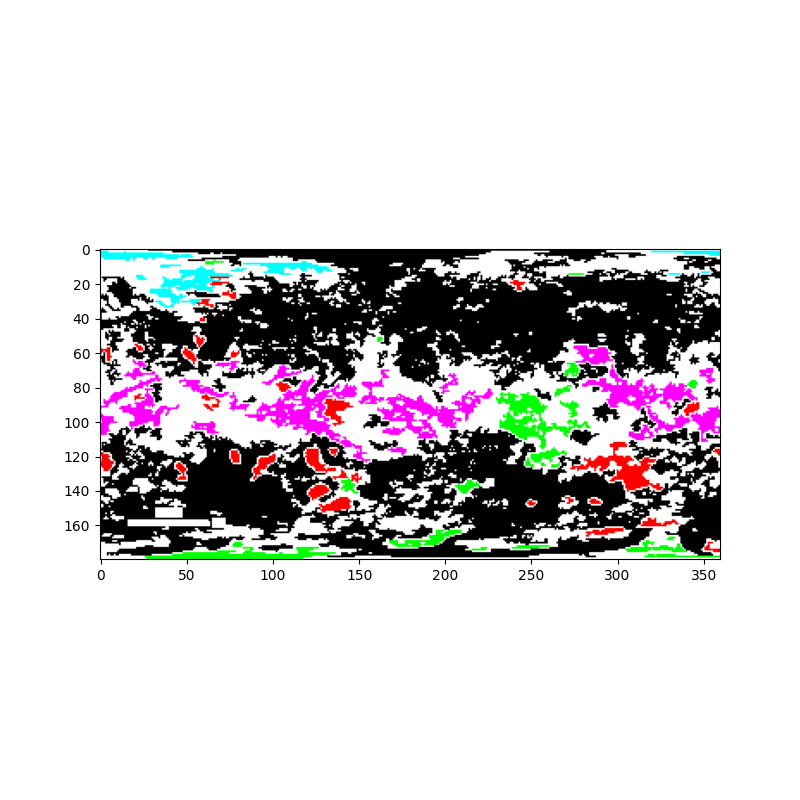

In [11]:
%matplotlib ipympl

x,y = 0,0
test = 0 #Point is unknown

while (y < len(ima1)):
    x=0
    while (x < len(ima1[0])):
        #Basically, only if not out of bounds do we do anything. 
        test = 0
        if (ima1[y][x][0] == 0):
            if (ima1[y][x][1] == 0):
                if (ima1[y][x][2] == 0):
                    test = 1 #Point is good!
                else: 
                    test = -1 #Point is bad!
            elif (ima1[y][x][1] == 255):
                if (ima1[y][x][2] == 255):
                    test = 1
                elif (ima1[y][x][2] == 0):
                    test = 1
                else:
                    test = -1
            else:
                test = -1
        elif (ima1[y][x][0] == 255):
            if (ima1[y][x][1] == 0):
                if (ima1[y][x][2] == 0):
                    test = 1
                elif (ima1[y][x][2] == 255):
                    test = 1
                else:
                    test = -1
            else:
                test = -1
        else:
            test = -1
        if (test == -1):
            ima1[y][x][0] = 255
            ima1[y][x][1] = 255
            ima1[y][x][2] = 255
        x=x+1
    y=y+1

plt.close()
fig, ax = plt.subplots(figsize = (8,8))
image = ax.imshow(ima1)

Image.fromarray(ima1).save("NewTitanMask.bmp")

0
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
1
[0, 0, 0]
103.0 103.0 103.0
40.73139908155987
2
[0, 0, 0]
114.0 114.0 114.0
44.93538314608824
3
[114, 0, 0]
114.0 0.0 0.0
44.942228238853986
4
[114, 0, 0]
114.0 0.0 0.0
44.942228238853986
5
[0, 0, 0]
114.0 114.0 114.0
44.93538314608824
6
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
7
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
8
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
9
[0, 0, 0]
114.0 114.0 114.0
44.93538314608824
10
[0, 0, 0]
114.0 114.0 114.0
44.88063491667221
11
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
12
[0, 0, 0]
114.0 114.0 114.0
44.832748460664604
13
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
14
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
15
[0, 0, 0]
114.0 114.0 114.0
44.771205175319345
16
[114, 0, 0]
114.0 0.0 0.0
44.942228238853986
17
[114, 0, 0]
114.0 0.0 0.0
44.942228238853986
18
[0, 0, 0]
113.0 113.0 113.0
44.50484262159442
19
[0, 0, 0]
114.0 114.0 114.0
44.942228238853986
20
[0, 0, 0]
114.0 114.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..1500].


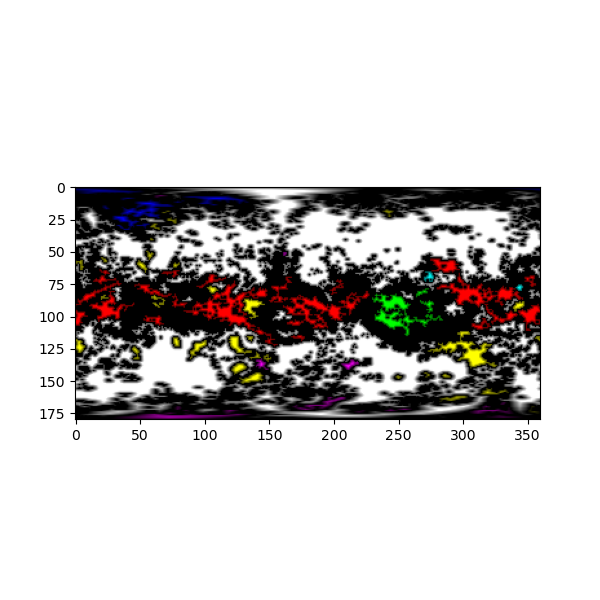

In [4]:
#Now we need to read in the images so we can manipulate them.
im2 = Image.open("NewTitanMask.bmp")
ima2 = np.array(im2)

def deg2rad(deg):
    return deg*(math.pi/180)

def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 2575 #Radius of Titan
    dLat = deg2rad(lat2-lat1)  # deg2rad below
    dLon = deg2rad(lon2-lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    #c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    c = 2 * math.asin(math.sqrt(a))
    d = R * c; #Distance in km
    return d;

distanceMask = [[[0 for x in range(3)] for x in range(360)] for x in range(180)]
distanceValues = [[[0 for x in range(3)] for x in range(360)] for x in range(180)]

x,y = 0,0
while (x < 360):
    y=0
    print(x)
    while (y < 180):
        if(((ima2[y][x][0] == 255) and (ima2[y][x][1] == 255) and (ima2[y][x][2] == 255))== False): 
            #If it's already zero there's no need to change it.
            lat = 90 - y #Get real latitude.
            lon = x #x meanwhile correlates perfectly. ...We think, we should probably check that 0 lon is what we think 0 lon is...
            #Fortunately edges are hard divides so we don't have to make looping code, just "edge" code.
            #A smart way to do this would be to do an expansive algorithm. The dumb way to do it is to look at every pixel. The distance calculation isn't complicated, and we only have to do this once...
            #Slow and stupid but easy to code it is. Which means that for every pixel we look at... every pixel.
            dist = 10000 #larger than the radius of Titan, hehe. 
            X,Y = 0,0 #(x,y) for the second pixel. 
            while (X < 360):
                Y=0
                while (Y < 180):
                    if(((ima2[Y][X][0] == 255) and (ima2[Y][X][1] == 255) and (ima2[Y][X][2] == 255))==True): #Now we only care if a pixel IS zero!
                        LAT = 90 - Y #Get real latitude.
                        LON = X #x meanwhile correlates perfectly. ...We think, we should probably check that 0 lon is what we think 0 lon is...
                        #print(lat,lon,LAT,LON)
                        newdist = getDistanceFromLatLonInKm(lat,lon,LAT,LON)
                        if (newdist < dist):
                            dist = newdist
                    Y=Y+1
                X=X+1
            if(((ima2[y][x][0] == 0) and (ima2[y][x][1] == 0) and (ima2[y][x][2] == 0))==True):
                distanceMask[y][x][0] = int(1.*dist/100.*255.)
                distanceMask[y][x][1] = int(1.*dist/100.*255.)
                distanceMask[y][x][2] = int(1.*dist/100.*255.)
                distanceValues[y][x][0] = dist/100.*255.
                distanceValues[y][x][1] = dist/100.*255.
                distanceValues[y][x][2] = dist/100.*255.
            else:
                distanceMask[y][x][0] = int((ima2[y][x][0]/255.)*dist/100.*255.)
                distanceMask[y][x][1] = int((ima2[y][x][1]/255.)*dist/100.*255.)
                distanceMask[y][x][2] = int((ima2[y][x][2]/255.)*dist/100.*255.)
                distanceValues[y][x][0] = (ima2[y][x][0]/255.)*dist/100.*255.
                distanceValues[y][x][1] = (ima2[y][x][1]/255.)*dist/100.*255.
                distanceValues[y][x][2] = (ima2[y][x][2]/255.)*dist/100.*255.
    #no need to set white pixels to black, as black is default! 
        if (y == 90):
            print(distanceMask[y][x])
            print((ima2[y][x][0]/255)*int(dist/100*255), (ima2[y][x][1]/255)*int(dist/100*255), (ima2[y][x][2]/255)*int(dist/100*255))
            print(dist)
        y=y+1
    x=x+1

plt.close()
fig, ax = plt.subplots(figsize = (6,6))
image = ax.imshow(distanceMask, vmax=1000, vmin=-1000)

#Tifs are stored by y, x, and then RGB. RGB is mostly irrelevant to us though, as this is monochrome. 

NameError: name 'distanceMask' is not defined

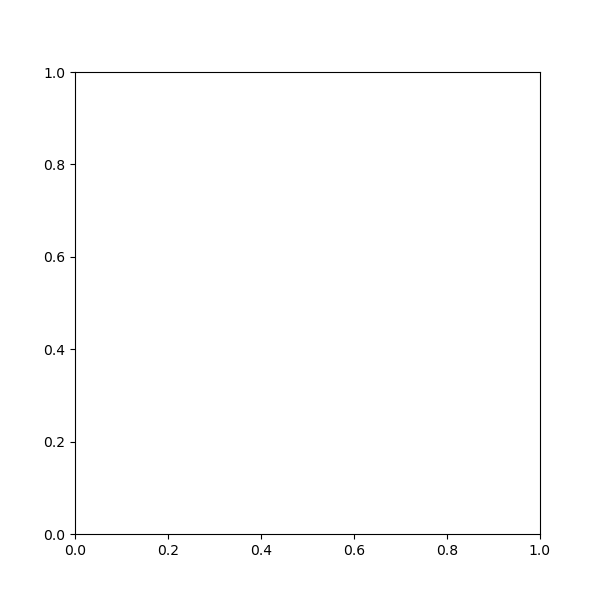

In [3]:
import matplotlib.image

plt.close()
fig, ax = plt.subplots(figsize = (6,6))
image = ax.imshow(distanceMask)
np.save("RealValuesArray.npy", distanceValues)
np.save("CLRMaskArray.npy", distanceMask)

matplotlib.image.imsave('CLRMask.bmp',distanceMask)

#imm = Image.fromarray(distanceMask)
#imm.save("CLRMask.bmp")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..1500].


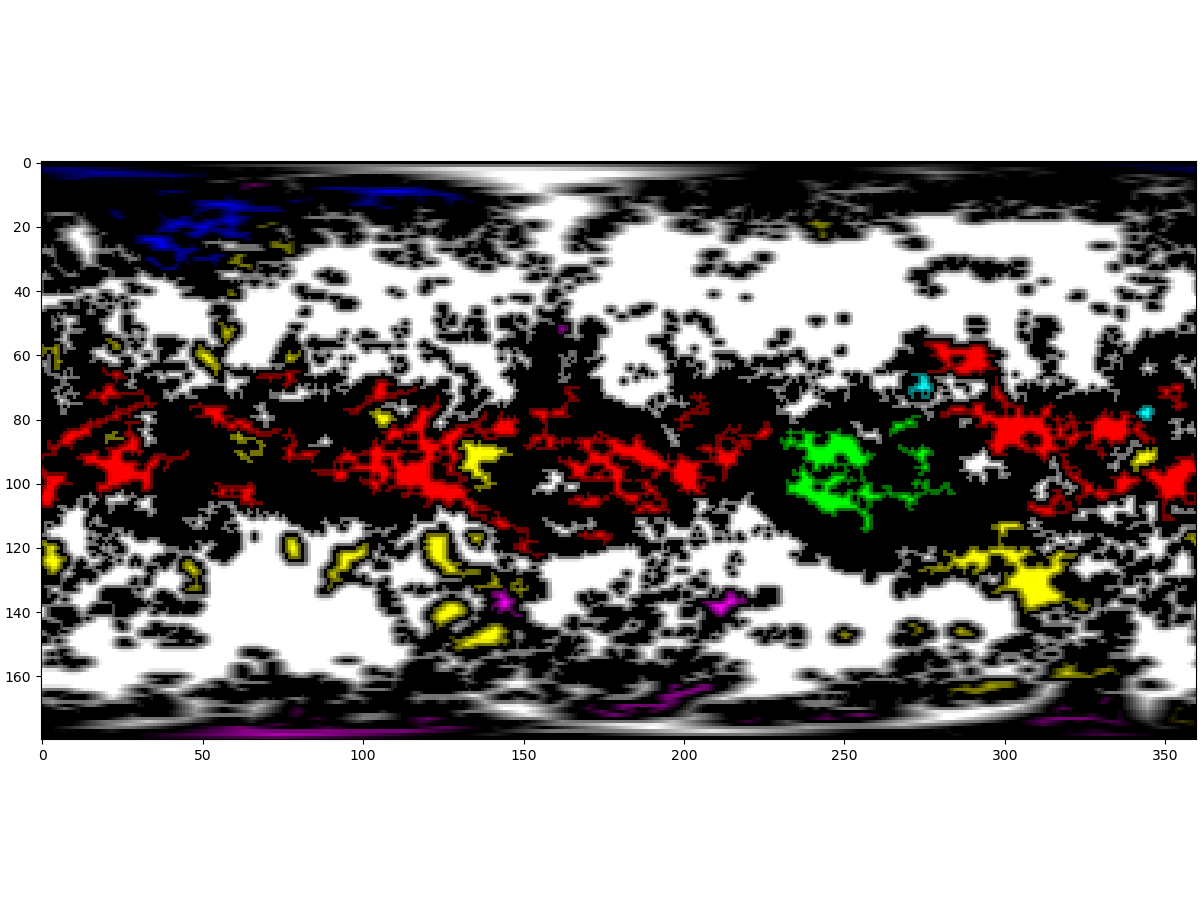

In [7]:
tester = np.load("CLRMaskArray.npy")

plt.close()
fig, ax = plt.subplots(figsize = (12,9),layout="constrained")
image = ax.imshow(tester)

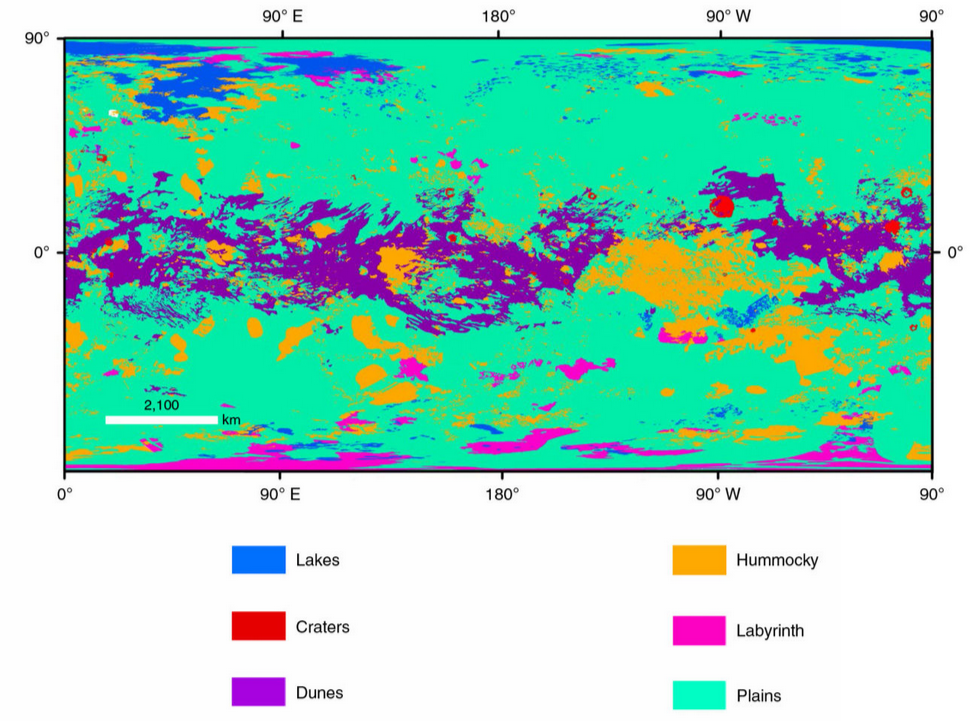

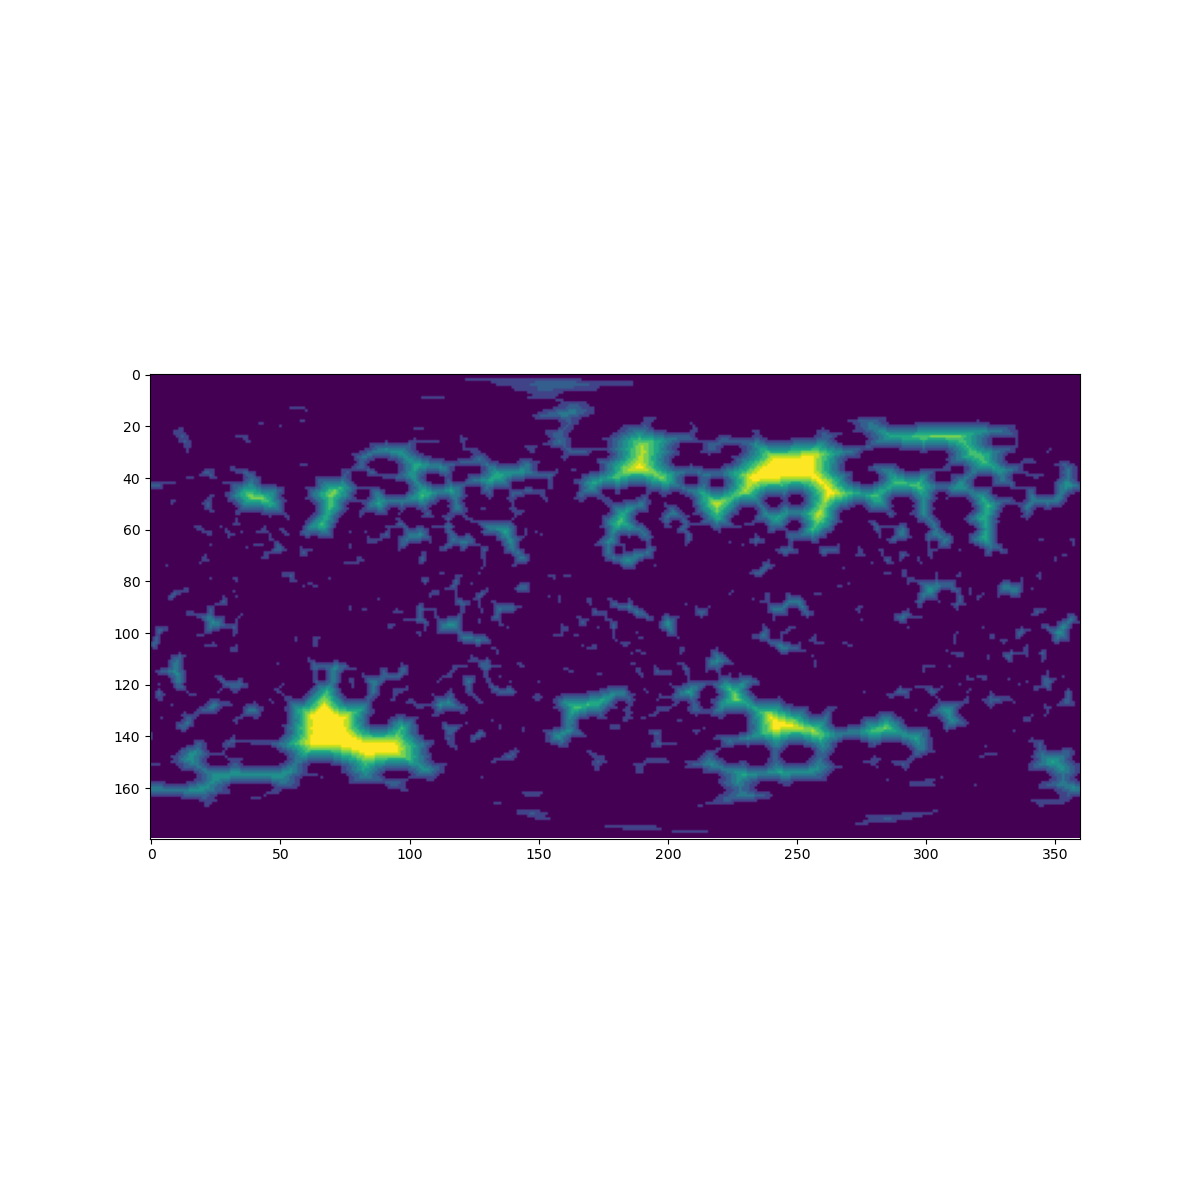

In [11]:
relDistanceMask = [[0 for x in range(360)] for x in range(180)]

x,y = 0,0
while (x < 360):
    y=0
    while (y < 180):
        if (tester[y][x][0] != 0 ):
            relDistanceMask[y][x] = tester[y][x][0] - (tester[y][x][0]%100)
        if (tester[y][x][1] != 0 ):
            relDistanceMask[y][x] = tester[y][x][1] - (tester[y][x][1]%100)
        if (tester[y][x][2] != 0 ):
            relDistanceMask[y][x] = tester[y][x][2] - (tester[y][x][2]%100)
        if (relDistanceMask[y][x] < 200):
            relDistanceMask[y][x] = 0
        if (relDistanceMask[y][x] >= 1000):
            relDistanceMask[y][x] = 1000
    #no need to set white pixels to black, as black is default! 
        y=y+1
    x=x+1

fig, ax = plt.subplots(figsize = (12,12))
image = ax.imshow(relDistanceMask)

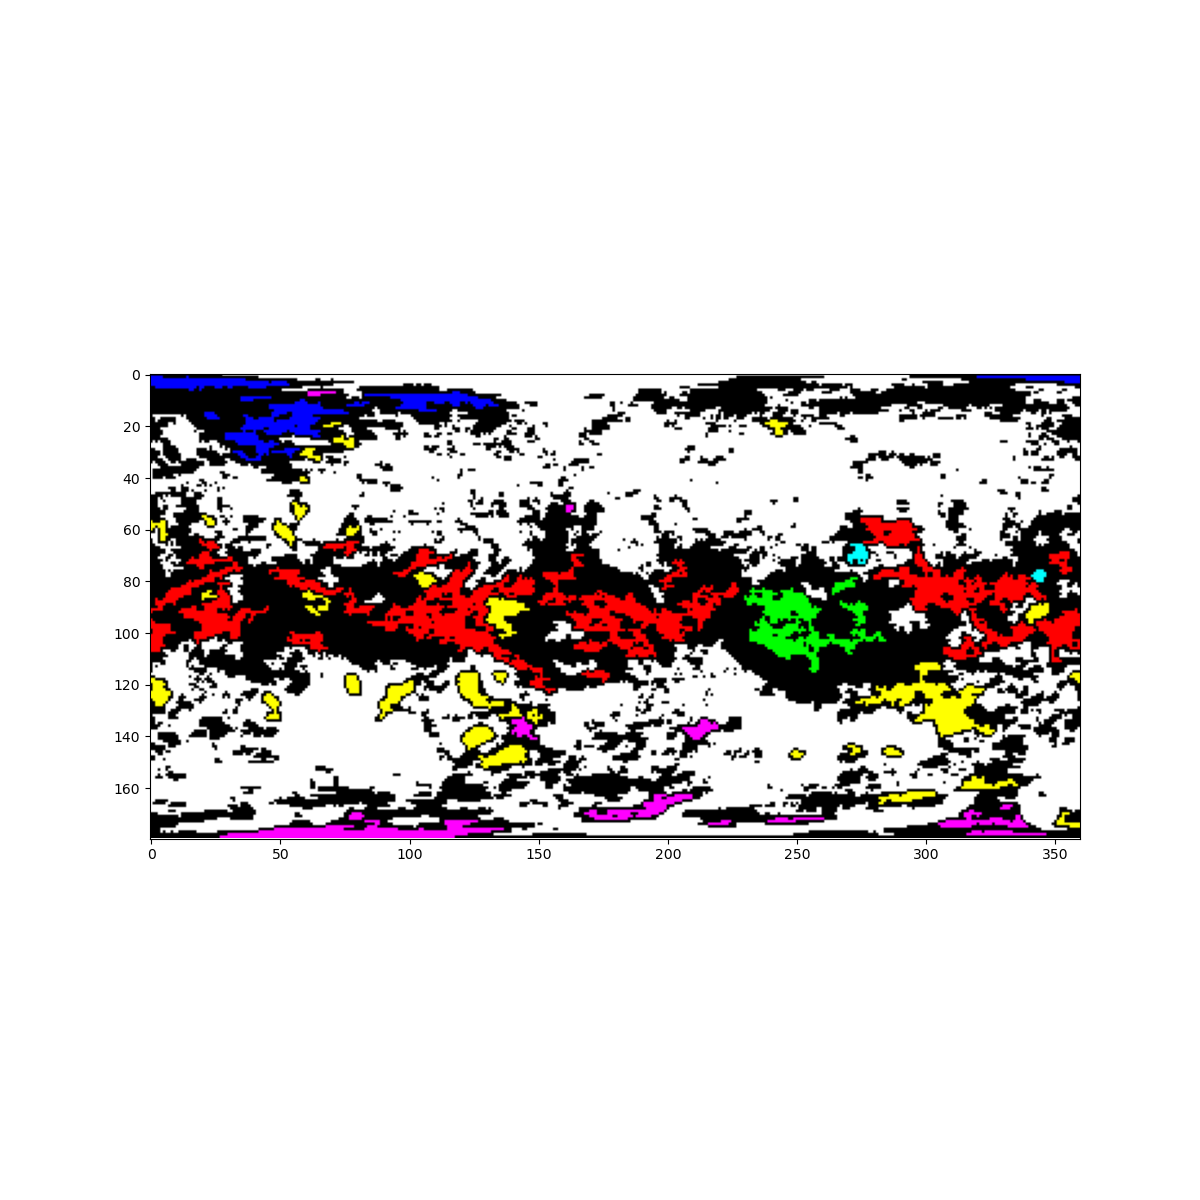

In [3]:
im4 = Image.open("NewTitanMask.bmp")
ima4 = np.array(im4)

revertMask = [[[0 for x in range(3)] for x in range(360)] for x in range(180)]

x,y = 0,0
while (x < 360):
    y=0
    while (y < 180):
        if(((ima4[y][x][0] == 255) and (ima4[y][x][1] == 255) and (ima4[y][x][2] == 255))== True): 
            revertMask[y][x][0] = 0
            revertMask[y][x][1] = 0
            revertMask[y][x][2] = 0
        elif(((ima4[y][x][0] == 0) and (ima4[y][x][1] == 0) and (ima4[y][x][2] == 0))== True): 
            revertMask[y][x][0] = 255
            revertMask[y][x][1] = 255
            revertMask[y][x][2] = 255
        else:
            revertMask[y][x][0] = ima4[y][x][0]
            revertMask[y][x][1] = ima4[y][x][1]
            revertMask[y][x][2] = ima4[y][x][2]
    #no need to set white pixels to black, as black is default! 
        y=y+1
    x=x+1

fig, ax = plt.subplots(figsize = (12,12))
image = ax.imshow(revertMask)

np.save("revertMaskArray.npy", revertMask)